In [1]:
#работа с данными
import pandas as pd
import numpy as np

#визуализация
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# статистика
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats.distributions import chi2


from statsmodels.tsa.arima_model import ARMA
import scipy.stats
import pylab

#### Загрузка и трансформация данных

In [2]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
# b - business days
# d - days
# a - annualy
df_comp = df_comp.fillna(method  = 'ffill')

## Убираем лишнее

In [3]:
df_comp['market_value'] = df_comp.ftse
df_comp = df_comp[['market_value']]
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## THE ACF and PACF

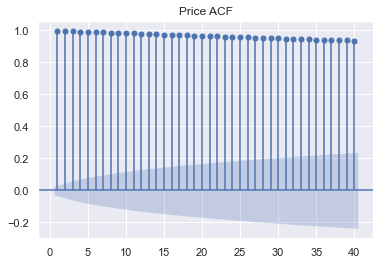

In [4]:
sgt.plot_acf(df.market_value, zero = False, lags = 40, title = 'Price ACF')
plt.show()

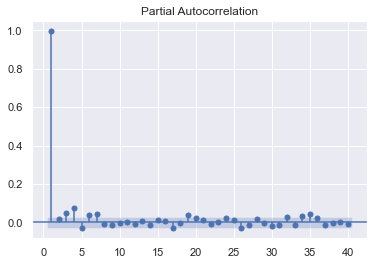

In [5]:
sgt.plot_pacf(df.market_value, lags = 40, alpha=0.05, zero = False,
             method = ('ols'))
plt.show()

## The AR(1) Model

In [23]:
model_ar = ARMA(df.market_value, order = (1, 0))

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [24]:
results_ar = model_ar.fit()

In [25]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Fri, 19 Mar 2021   AIC                          55251.196
Time:                        12:02:16   BIC                          55270.760
Sample:                    01-07-1994   HQIC                         55258.051
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5055.0650    486.203     10.397      0.000    4102.125    6008.005
ar.L1.market_value     0.9985      0.001   1298.778      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

## Higher lag AR model

### AR(2)

In [26]:
model_ar2 = ARMA(df.market_value, order = (2, 0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Fri, 19 Mar 2021   AIC                          55251.742
Time:                        12:02:25   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    495.706     10.267      0.000    4118.074    6061.208
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4629           +0.0000j           58.4629            0.5000
-----------------------------------------------------------------------------
"""

rejecting H0 - price 2 days ago does not affect today`s prices

### AR(3)

In [27]:
model_ar3 = ARMA(df.market_value, order = (3, 0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.865
Method:                       css-mle   S.D. of innovations             59.178
Date:                Fri, 19 Mar 2021   AIC                          55241.731
Time:                        12:02:28   BIC                          55274.338
Sample:                    01-07-1994   HQIC                         55253.157
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5036.8290    519.725      9.691      0.000    4018.186    6055.472
ar.L1.market_value     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1851           -4.5161j            4.5199           -0.2565
AR.3           -0.1851           +4.5161j            4.5199            0.2565
-----------------------------------------------------------------------------
"""

### AR4

In [28]:
model_ar4 = ARMA(df.market_value, order = [4, 0])
results_ar4 = model_ar4.fit()
results_ar4.summary()

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Fri, 19 Mar 2021   AIC                          55217.130
Time:                        12:02:30   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    560.000      9.089      0.000    3992.061    6187.222
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

## Log Likelihood test - LLR

In [29]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [30]:
LLR_test(model_ar2, model_ar3)

0.001

In [31]:
LLR_test(model_ar3, model_ar4)

0.0

In [32]:
model_ar5 = ARMA(df.market_value, order = [5, 0])
results_ar5 = model_ar5.fit()
print(results_ar5.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ar4, model_ar5)))

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.348
Method:                       css-mle   S.D. of innovations             58.996
Date:                Fri, 19 Mar 2021   AIC                          55214.697
Time:                        12:02:42   BIC                          55260.346
Sample:                    01-07-1994   HQIC                         55230.693
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    543.569      9.363      0.000    4024.265    6155.017
ar.L1.market_value     0.9791      0.014     69.481      0.000       0.952       1.007
ar.L2.market_value  

In [33]:
model_ar6 = ARMA(df.market_value, order = [6, 0])
results_ar6 = model_ar6.fit()
print(results_ar6.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ar5, model_ar6)))

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Fri, 19 Mar 2021   AIC                          55208.947
Time:                        12:03:06   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    565.233      9.005      0.000    3981.805    6197.478
ar.L1.market_value     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.market_value  

In [34]:
model_ar7 = ARMA(df.market_value, order = [7, 0])
results_ar7 = model_ar7.fit()
print(results_ar7.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ar6, model_ar7)))

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Fri, 19 Mar 2021   AIC                          55201.799
Time:                        12:03:28   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    589.534      8.633      0.000    3934.177    6245.106
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value  

In [35]:
model_ar8 = ARMA(df.market_value, order = [8, 0])
results_ar8 = model_ar8.fit()
print(results_ar8.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ar7
                                             , model_ar8)))

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Fri, 19 Mar 2021   AIC                          55203.478
Time:                        12:04:08   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6416    585.009      8.700      0.000    3943.044    6236.239
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value  

including prices fro 8 periods ago does`n improve model in meaningful wau

In [37]:
print('\nLLR test p-value = ' + str(LLR_test(model_ar
                                             , model_ar7, DF=6)))


LLR test p-value = 0.0


In [38]:
sts.adfuller(df.market_value)

(-1.9041551418836864,
 0.33010893277028336,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

Не можем сказать что данные из стационарного процесса

AR - модели не подходят для стационарных процессов

return - % change betweeen the values for two consecutive periods

## Using Returns

(Pt - Pt-1 / Pt-1)*100

In [52]:
df['returns'] = df.market_value.pct_change(1).mul(100)

<ipython-input-52-c23bd44795a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1).mul(100)


In [53]:
df

,market_value,returns
date,,
1994-01-10,3440.58,NaN
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842
...,...,...
2013-04-01,6411.74,0.000000
2013-04-02,6490.66,1.230867
2013-04-03,6420.28,-1.084327


In [54]:
df = df.iloc[1:]

In [55]:
df

,market_value,returns
date,,
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842
1994-01-17,3407.83,0.213788
...,...,...
2013-04-01,6411.74,0.000000
2013-04-02,6490.66,1.230867
2013-04-03,6420.28,-1.084327


In [56]:
sts.adfuller(df.returns)

(-12.790332603910104,
 7.099523586676406e-24,
 32,
 4986,
 {'1%': -3.43166220814716,
  '5%': -2.862119853748156,
  '10%': -2.567078656914853},
 15690.778602127364)

теперь можем подтвердить что процесс стационарный

## ACF and PACF for Returns

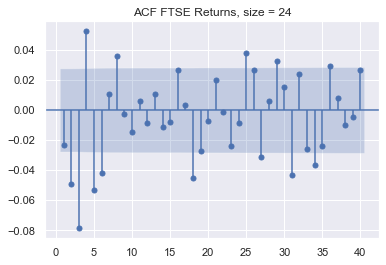

In [57]:
sgt.plot_acf(df.returns, lags=40, zero = False)
plt.title('ACF FTSE Returns, size = 24')
plt.show()

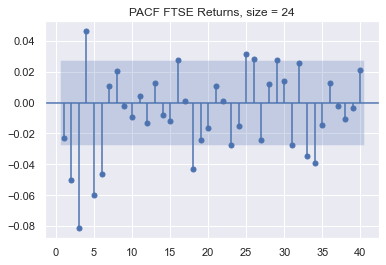

In [59]:
sgt.plot_pacf(df.returns, lags=40, zero = False, method=('ols'))
plt.title('PACF FTSE Returns, size = 24')
plt.show()

## AR(1) - Returns

In [61]:
model_ret_ar_1 = ARMA(df.returns, order = [1, 0])
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ar_1.summary()


C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(1, 0)   Log Likelihood               -7928.655
Method:                       css-mle   S.D. of innovations              1.174
Date:                Fri, 19 Mar 2021   AIC                          15863.311
Time:                        14:50:15   BIC                          15882.874
Sample:                    01-11-1994   HQIC                         15870.166
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.161      0.246      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.633      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.3964           +0.0000j           43.3964            0.5000
-----------------------------------------------------------------------------
"""

P-values > 0.05
Need to check for higher lags

## Higher-Lag AR models for Returns

In [62]:
model_ret_ar_2 = ARMA(df.returns, order = (2, 0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()


C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(2, 0)   Log Likelihood               -7922.353
Method:                       css-mle   S.D. of innovations              1.173
Date:                Fri, 19 Mar 2021   AIC                          15852.707
Time:                        14:52:44   BIC                          15878.790
Sample:                    01-11-1994   HQIC                         15861.847
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.223      0.221      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.718      0.086      -0.052       0.003
ar.L2.returns    -0.0501      0.014     -3.552      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4614j            4.4680           -0.2586
AR.2           -0.2417           +4.4614j            4.4680            0.2586
-----------------------------------------------------------------------------
"""

In [63]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.0

In [64]:

model_ret_ar_3 = ARMA(df.returns, order = (3, 0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(3, 0)   Log Likelihood               -7905.632
Method:                       css-mle   S.D. of innovations              1.169
Date:                Fri, 19 Mar 2021   AIC                          15821.264
Time:                        14:54:07   BIC                          15853.869
Sample:                    01-11-1994   HQIC                         15832.689
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.333      0.182      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.013      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.708      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.793      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9230           -2.0209j            2.2217           -0.1818
AR.2            0.9230           +2.0209j            2.2217            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

2,3,4 p-values significant at 5 percent value

In [65]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.0

Log-Likelihoods are extremely different

In [66]:
model_ret_ar_4 = ARMA(df.returns, order = (4, 0))
results_ret_ar_4 = model_ret_ar_4.fit()
results_ret_ar_4.summary()

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(4, 0)   Log Likelihood               -7900.213
Method:                       css-mle   S.D. of innovations              1.168
Date:                Fri, 19 Mar 2021   AIC                          15812.427
Time:                        14:55:53   BIC                          15851.553
Sample:                    01-11-1994   HQIC                         15826.137
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.271      0.204      -0.010       0.048
ar.L1.returns    -0.0246      0.014     -1.741      0.082      -0.052       0.003
ar.L2.returns    -0.0497      0.014     -3.535      0.000      -0.077      -0.022
ar.L3.returns    -0.0802      0.014     -5.702      0.000      -0.108      -0.053
ar.L4.returns     0.0465      0.014      3.294      0.001       0.019       0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8885           -0.0000j            1.8885           -0.5000
AR.2            0.3228           -1.9326j            1.9594           -0.2237
AR.3            0.3228           +1.9326j            1.9594            0.2237
AR.4            2.9689           -0.0000j            2.9689           -0.0000
-----------------------------------------------------------------------------
"""

In [67]:
LLR_test(model_ret_ar_3, model_ret_ar_4)

0.001

In [68]:
model_ret_ar_5 = ARMA(df.returns, order = (5, 0))
results_ret_ar_5 = model_ret_ar_5.fit()
results_ret_ar_5.summary()

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(5, 0)   Log Likelihood               -7891.277
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 19 Mar 2021   AIC                          15796.553
Time:                        14:56:24   BIC                          15842.200
Sample:                    01-11-1994   HQIC                         15812.549
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.352      0.176      -0.009       0.046
ar.L1.returns    -0.0218      0.014     -1.546      0.122      -0.049       0.006
ar.L2.returns    -0.0545      0.014     -3.868      0.000      -0.082      -0.027
ar.L3.returns    -0.0831      0.014     -5.915      0.000      -0.111      -0.056
ar.L4.returns     0.0450      0.014      3.193      0.001       0.017       0.073
ar.L5.returns    -0.0596      0.014     -4.232      0.000      -0.087      -0.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5480           -0.0000j            1.5480           -0.5000
AR.2           -0.2858           -1.7251j            1.7486           -0.2761
AR.3           -0.2858           +1.7251j            1.7486            0.2761
AR.4            1.4368           -1.2158j            1.8822           -0.1118
AR.5            1.4368           +1.2158j            1.8822            0.1118
-----------------------------------------------------------------------------
"""

In [69]:
LLR_test(model_ret_ar_4, model_ret_ar_5)

0.0

In [70]:
model_ret_ar_6 = ARMA(df.returns, order = (6, 0))
results_ret_ar_6 = model_ret_ar_6.fit()
results_ret_ar_6.summary()

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(6, 0)   Log Likelihood               -7885.842
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 19 Mar 2021   AIC                          15787.684
Time:                        14:56:54   BIC                          15839.852
Sample:                    01-11-1994   HQIC                         15805.965
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.418      0.156      -0.007       0.045
ar.L1.returns    -0.0246      0.014     -1.742      0.082      -0.052       0.003
ar.L2.returns    -0.0524      0.014     -3.719      0.000      -0.080      -0.025
ar.L3.returns    -0.0870      0.014     -6.174      0.000      -0.115      -0.059
ar.L4.returns     0.0424      0.014      3.012      0.003       0.015       0.070
ar.L5.returns    -0.0607      0.014     -4.308      0.000      -0.088      -0.033
ar.L6.returns    -0.0465      0.014     -3.299      0.001      -0.074      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2871           -0.9023j            1.5719           -0.0973
AR.2            1.2871           +0.9023j            1.5719            0.0973
AR.3           -0.0727           -1.5282j            1.5299           -0.2576
AR.4           -0.0727           +1.5282j            1.5299            0.2576
AR.5           -1.8665           -0.4831j            1.9280           -0.4597
AR.6           -1.8665           +0.4831j            1.9280            0.4597
-----------------------------------------------------------------------------
"""

In [71]:
LLR_test(model_ret_ar_5, model_ret_ar_6)

0.001

In [72]:
model_ret_ar_7 = ARMA(df.returns, order = (7, 0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(7, 0)   Log Likelihood               -7885.542
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 19 Mar 2021   AIC                          15789.083
Time:                        14:57:19   BIC                          15847.772
Sample:                    01-11-1994   HQIC                         15809.649
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.402      0.161      -0.008       0.045
ar.L1.returns    -0.0241      0.014     -1.704      0.088      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.666      0.000      -0.079      -0.024
ar.L3.returns    -0.0875      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.returns     0.0434      0.014      3.068      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.262      0.000      -0.088      -0.032
ar.L6.returns    -0.0462      0.014     -3.278      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.775      0.438      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6487           -0.5383j            1.7344           -0.4498
AR.2           -1.6487           +0.5383j            1.7344            0.4498
AR.3           -0.1191           -1.4953j            1.5000           -0.2626
AR.4           -0.1191           +1.4953j            1.5000            0.2626
AR.5            1.2791           -0.9793j            1.6109           -0.1040
AR.6            1.2791           +0.9793j            1.6109            0.1040
AR.7            5.2032           -0.0000j            5.2032           -0.0000
-----------------------------------------------------------------------------
"""

In [73]:
LLR_test(model_ret_ar_6, model_ret_ar_7)

0.438

Выбираем AR(6)

## Normalizing

каждую переменную в ряду выражаем в процентах от первой

In [74]:
benchmark = df.market_value.iloc[0]

In [75]:
df['norm'] = df.market_value.div(benchmark).mul(100)

<ipython-input-75-45ec805b2434>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm'] = df.market_value.div(benchmark).mul(100)


In [77]:
sts.adfuller(df.norm)

(-1.8779457772515615,
 0.3425061668481372,
 6,
 5012,
 {'1%': -3.431655397510801,
  '5%': -2.862116844845668,
  '10%': -2.567077055158601},
 19627.21698752037)

High p-value - not stationary data

In [81]:
benchmark_ret = df.returns.iloc[0]

In [82]:
df['ret_norm'] = df.returns.div(benchmark_ret).mul(100)

<ipython-input-82-ec3213c73f6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ret_norm'] = df.returns.div(benchmark_ret).mul(100)


In [83]:
sts.adfuller(df.ret_norm)

(-12.790332603910006,
 7.099523586679614e-24,
 32,
 4986,
 {'1%': -3.43166220814716,
  '5%': -2.862119853748156,
  '10%': -2.567078656914853},
 64101.053116833515)

normalized returns are stationary

## Normalized Returns

In [85]:
model_norm_ret_ar_1 = ARMA(df.ret_norm, order = (1,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               ret_norm   No. Observations:                 5019
Model:                     ARMA(1, 0)   Log Likelihood              -32293.995
Method:                       css-mle   S.D. of innovations            150.718
Date:                Fri, 19 Mar 2021   AIC                          64593.990
Time:                        15:13:24   BIC                          64613.553
Sample:                    01-11-1994   HQIC                         64600.845
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.4136      2.080     -1.161      0.246      -6.489       1.662
ar.L1.ret_norm    -0.0230      0.014     -1.633      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.3966           +0.0000j           43.3966            0.5000
-----------------------------------------------------------------------------
"""

In [86]:
model_norm_ret_ar_2 = ARMA(df.ret_norm, order = (2,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               ret_norm   No. Observations:                 5019
Model:                     ARMA(2, 0)   Log Likelihood              -32287.693
Method:                       css-mle   S.D. of innovations            150.529
Date:                Fri, 19 Mar 2021   AIC                          64583.386
Time:                        15:13:45   BIC                          64609.470
Sample:                    01-11-1994   HQIC                         64592.526
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.4190      1.978     -1.223      0.221      -6.295       1.458
ar.L1.ret_norm    -0.0242      0.014     -1.718      0.086      -0.052       0.003
ar.L2.ret_norm    -0.0501      0.014     -3.552      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4614j            4.4680           -0.2586
AR.2           -0.2417           +4.4614j            4.4680            0.2586
-----------------------------------------------------------------------------
"""

In [87]:
model_norm_ret_ar_7 = ARMA(df.ret_norm, order = (7,0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

C:\Users\vlady\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               ret_norm   No. Observations:                 5019
Model:                     ARMA(7, 0)   Log Likelihood              -32250.881
Method:                       css-mle   S.D. of innovations            149.428
Date:                Fri, 19 Mar 2021   AIC                          64519.763
Time:                        15:14:46   BIC                          64578.452
Sample:                    01-11-1994   HQIC                         64540.328
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.4333      1.736     -1.402      0.161      -5.836       0.969
ar.L1.ret_norm    -0.0241      0.014     -1.704      0.088      -0.052       0.004
ar.L2.ret_norm    -0.0517      0.014     -3.666      0.000      -0.079      -0.024
ar.L3.ret_norm    -0.0875      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.ret_norm     0.0434      0.014      3.068      0.002       0.016       0.071
ar.L5.ret_norm    -0.0601      0.014     -4.262      0.000      -0.088      -0.032
ar.L6.ret_norm    -0.0462      0.014     -3.278      0.001      -0.074      -0.019
ar.L7.ret_norm     0.0109      0.014      0.775      0.438      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6487           -0.5383j            1.7344           -0.4498
AR.2           -1.6487           +0.5383j            1.7344            0.4498
AR.3           -0.1191           -1.4953j            1.5000           -0.2626
AR.4           -0.1191           +1.4953j            1.5000            0.2626
AR.5            1.2791           -0.9793j            1.6109           -0.1040
AR.6            1.2791           +0.9793j            1.6109            0.1040
AR.7            5.2031           -0.0000j            5.2031           -0.0000
-----------------------------------------------------------------------------
"""

Using Normalized returns has no impact on model selection

##  Analyzing the Residuals

In [88]:
df['res_price'] = results_ar7.resid

<ipython-input-88-52a56000fa4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_price'] = results_ar7.resid


In [89]:
df.res_price.mean()

0.6814252147210965

In [90]:
df.res_price.var()

3468.8025619623527

In [91]:
sts.adfuller(df.res_price)

(-70.8128299666478,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 54820.68444958137)

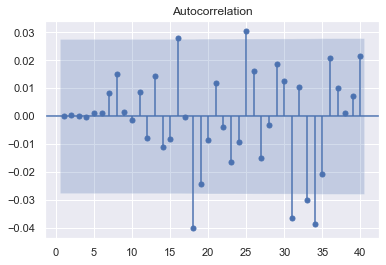

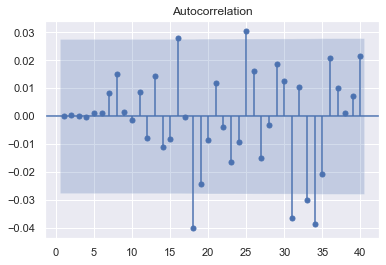

In [93]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)

<AxesSubplot:xlabel='date'>

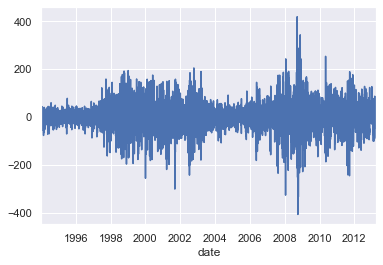

In [94]:
df.res_price[1:].plot()

In [101]:
df['res_returns'] = results_ret_ar_6.resid

<ipython-input-101-bd1992fb9217>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_returns'] = results_ret_ar_6.resid


In [102]:
df.res_returns.mean()

-6.5638767264973e-05

In [103]:
df.res_returns.var()

1.3562350562714254

In [104]:
sts.adfuller(df.res_returns)

(-70.77881437948956,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15686.691421451233)

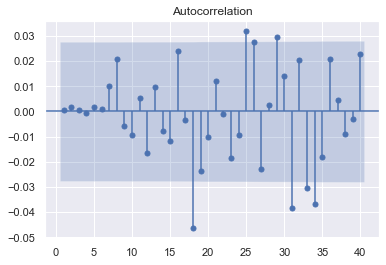

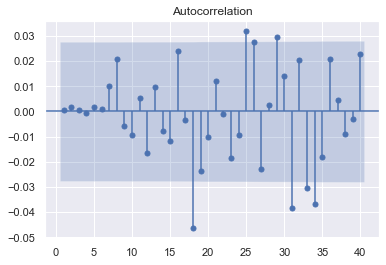

In [105]:
sgt.plot_acf(df.res_returns, zero = False, lags = 40)

<AxesSubplot:xlabel='date'>

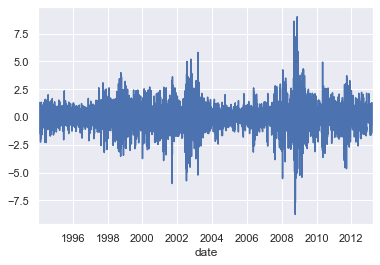

In [106]:
df.res_returns[1:].plot()